In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


def stockpriceanalysis(stock):
    stockprices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{stock}?serietype=line")
    stockprices = stockprices.json()

#Parse the API response and select only last 1200 days of prices
    stockprices = stockprices['historical'][-1200:]

#Convert from dict to pandas dataframe

    stockprices = pd.DataFrame.from_dict(stockprices)
    stockprices = stockprices.set_index('date')
    #20 days to represent the 22 trading days in a month
    stockprices['20d'] = stockprices['close'].rolling(5).mean()
    stockprices['250d'] = stockprices['close'].rolling(15).mean()
  
    stockprices[['close','20d','250d']].plot(figsize=(10,4))
    plt.grid(True)
    plt.title(stock + ' Moving Averages')
    plt.axis('tight')
    plt.ylabel('Price')

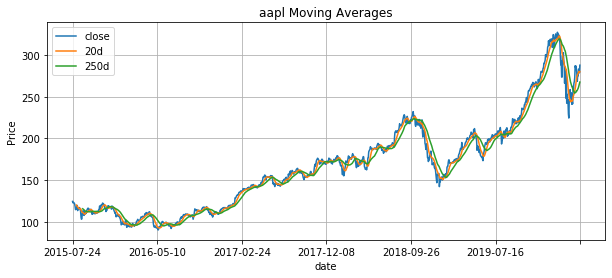

In [4]:
stockpriceanalysis('aapl')